# Description

“ConDrossiers” CoDros adalah sebuah perusahaan di Indonesia yang bergerak di bidang data management, data integration, dan database systems yang tujuannya adalah untuk mempersiapkan infrastruktur manajemen. Selain itu, CoDros juga berperan untuk mendefinisikan sistem kerja perusahaan yang belum terdefinisi dengan baik agar proses bisnis perusahaan tersebut dapat beroperasi dengan baik.

Setelah menjalani bisnisnya selama kurang lebih 12 tahun, CoDros dihadapi dengan situasi pandemi COVID-19 pada tahun 2020. Seluruh pegawainya tidak dapat melakukan pekerjaannya dari kantor dan harus beradaptasi dengan budaya work from home. Akibatnya, terdapat dugaan bahwa perubahan sistem kerja yang besar ini mengakibatkan perubahan perilaku pegawainya, bahkan hingga meningkatkan turnover rate perusahaan. Kecenderungan employee resignation ini mengancam kapabilitas operasional perusahaan sehingga manajemen perlu mengambil tindakan.

Ironisnya, perusahaan CoDros belum melakukan dokumentasi data pegawainya dengan baik; CoDros hanya memiliki data yang terbatas tentang pegawainya. Manajemen CoDros pun merekrut Anda sebagai Data Analyst untuk menganalisis karakteristik pegawai untuk mengetahui apakah mereka akan tetap bekerja di CoDros atau akan resign dalam waktu dekat. Harapannya, hasil analisis dan pemodelan yang Anda lakukan dapat menjadi cikal bakal langkah-langkah penting yang dapat diambil oleh manajemen untuk meningkatkan employee satisfaction di tengah masa adaptasi ini.

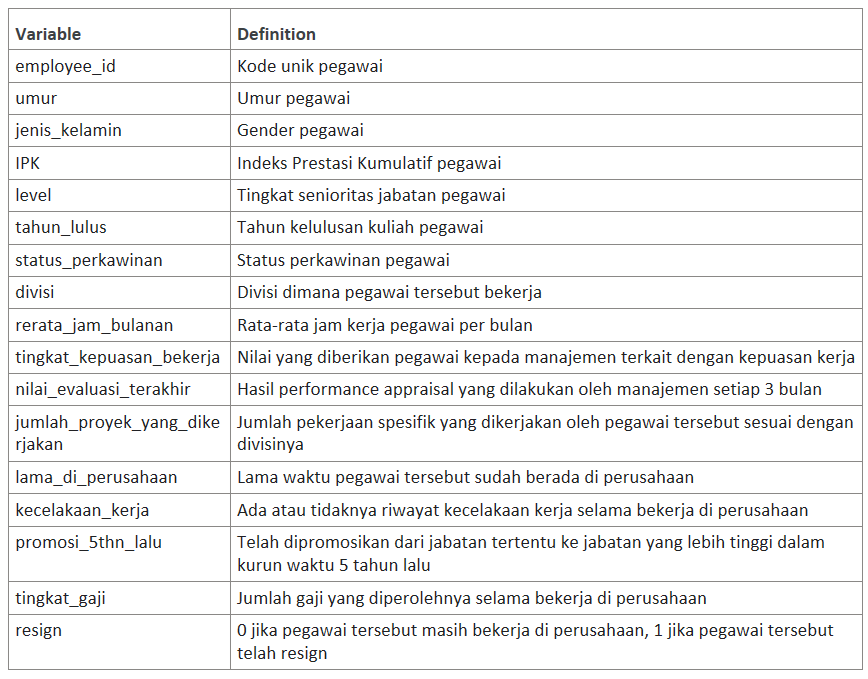

---

**OBJECTIVE**

"Finding the important variables to reduce the employee turnover rate"

This is a classification task, so here are the limitations that are going to be applied throughout this notebook:
1. Model used: Random Forest Classifier, Decision Trees Classifier, Light GBM Classifier, and XGBoost classifier
2. The metric used is F1 macro average
3. The imbalance treatment used is undersampling

# Initial

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Read file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test[train.drop('resign', axis = 1).columns] #Change column order for easier manipulation

print('-'*10, 'TRAIN', '-'*10)
display(train.head())
print('-'*10, 'TEST', '-'*10)
display(test.head())

---------- TRAIN ----------


,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji,resign
0,10000,NaN,Laki-laki,1.947303,Junior,NaN,Sudah Menikah,management,210.0,0.82,0.419035,3,3 Years,belum pernah,belum,sedang,0
1,10001,NaN,Laki-laki,3.218346,Full-Time,NaN,Belum Menikah,sales,189.0,0.76,0.558254,3,24 Months,belum pernah,belum,rendah,0
2,10002,NaN,Laki-laki,2.117364,Senior,NaN,Sudah Menikah,management,NaN,0.81,0.580364,5,2 Years,pernah,belum,tinggi,0
3,10003,NaN,Laki-laki,3.178748,Full-Time,NaN,Belum Menikah,sales,121.0,0.84,0.446109,3,36 Months,pernah,belum,rendah,0
4,10004,34.0,Laki-laki,2.680535,Part-Time,2008.0,Belum Menikah,technical,229.0,0.48,NaN,3,3 Years,belum pernah,belum,rendah,0


---------- TEST ----------


,employee_id,umur,jenis_kelamin,IPK,level,tahun_lulus,status_perkawinan,divisi,rerata_jam_bulanan,tingkat_kepuasan_bekerja,nilai_evaluasi_terakhir,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,tingkat_gaji
0,20049,NaN,Laki-laki,2.119406,Senior,NaN,Belum Menikah,technical,137.0,0.38,0.372242,2,36 Months,belum pernah,belum,rendah
1,20050,31.0,Laki-laki,2.554876,Part-Time,NaN,Sudah Menikah,sales,258.0,0.85,0.334727,3,3 Years,belum pernah,belum,sedang
2,20051,NaN,Laki-laki,1.151644,Probation,NaN,Sudah Menikah,marketing,257.0,0.91,0.459594,3,36 Months,belum pernah,belum,sedang
3,20052,NaN,Perempuan,1.963498,Senior,NaN,Belum Menikah,sales,142.0,0.42,0.370912,2,3 Years,belum pernah,belum,rendah
4,20053,NaN,Perempuan,1.666068,Junior,2007.0,Belum Menikah,sales,272.0,0.93,0.563354,3,2 Years,pernah,belum,rendah


In [3]:
# Explore data
def exploration(df):
    explore = pd.DataFrame(df.dtypes).rename(columns = {0:'type'})
    explore['is_na'] = df.isna().sum().values
    explore['is_na_prop'] = explore['is_na']/df.shape[0]
    explore['n_unique'] = df.nunique().values
    print('Number of rows = {}, Number of columns = {}'.format(df.shape[0], df.shape[1]))
    return explore

exploration(train)

Number of rows = 10049, Number of columns = 17


,type,is_na,is_na_prop,n_unique
employee_id,int64,0,0.000000,10049
umur,float64,7711,0.767340,36
jenis_kelamin,object,0,0.000000,2
IPK,float64,0,0.000000,10049
level,object,0,0.000000,6
tahun_lulus,float64,7711,0.767340,39
status_perkawinan,object,0,0.000000,2
divisi,object,0,0.000000,10
rerata_jam_bulanan,float64,1349,0.134242,261
tingkat_kepuasan_bekerja,float64,796,0.079212,92


In [4]:
# Explore test data
exploration(test)

Number of rows = 4950, Number of columns = 16


,type,is_na,is_na_prop,n_unique
employee_id,int64,0,0.000000,4950
umur,float64,3880,0.783838,36
jenis_kelamin,object,0,0.000000,2
IPK,float64,0,0.000000,4950
level,object,0,0.000000,6
tahun_lulus,float64,3799,0.767475,39
status_perkawinan,object,0,0.000000,2
divisi,object,0,0.000000,10
rerata_jam_bulanan,float64,588,0.118788,232
tingkat_kepuasan_bekerja,float64,466,0.094141,92


Insights:
- There are missing data in certain columns for both test and train test, and the missing columns are the same with almost the same percentage of missing value.
- jenis_kelamin and tahun_lulus have the most missing value, make up until 70% of the columns.

# Exploration

In [5]:
# Resign counts
train.resign.value_counts()

0    7657
1    2392
Name: resign, dtype: int64

There is an imbalance here, with the resign value (1) is almost one-third of the not resign value (0). This might influence the modelling, hance will be treated later

In [6]:
# Check duplicated value
train.duplicated().sum()

0

There is no duplicated value

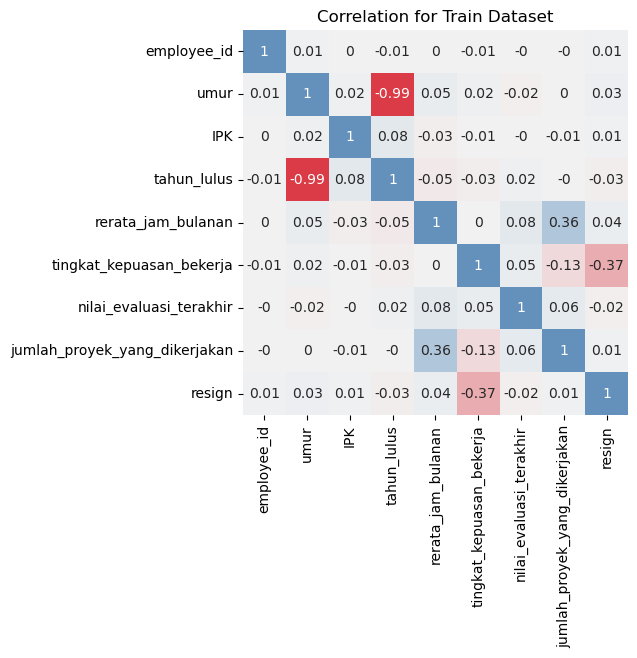

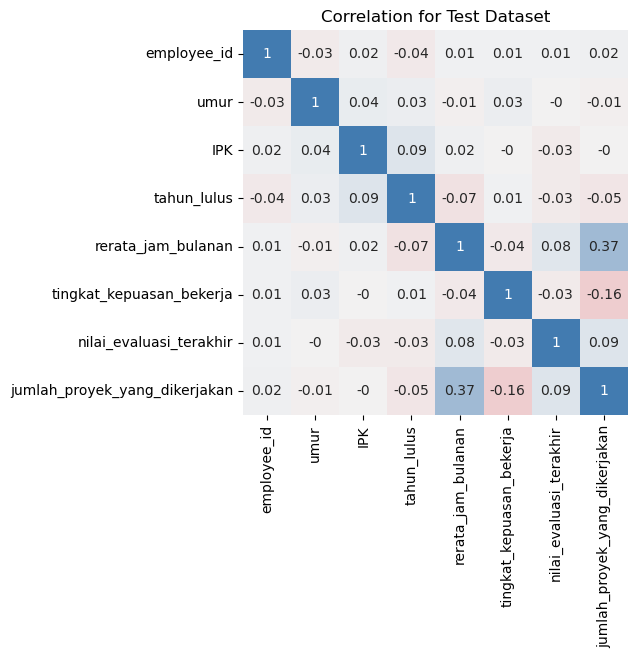

In [7]:
# Correlation
def correlation_map(data, size1 = 10, size2= 10, title = ''):
    plt.figure(figsize = (size1,size2))
    cmap = sns.diverging_palette(10, 245, as_cmap=True)
    corr_dat = round(data.corr(),2)
    sns.heatmap(corr_dat, vmax=.8, square=True, annot=True, cmap=cmap, center = 0.00, cbar = False) # mask= mask
    plt.title('Correlation'+ title)

correlation_map(train,5,5, ' for Train Dataset')
correlation_map(test,5,5, ' for Test Dataset')

Insight: 
- There is a very high correlation between umur and tahun_lulus in train_data
- jumlah_proyek_yang_dikerjakan has quite high correlation with tingkat_kepuasan_bekerja and rerata_jam_bulanan

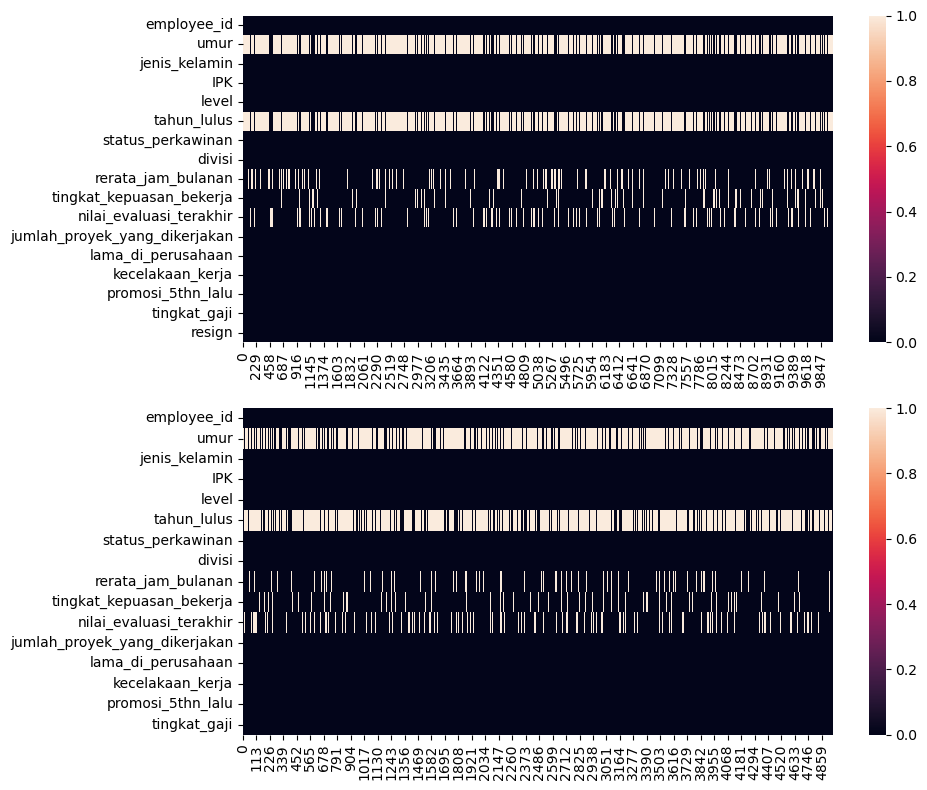

In [8]:
# Missing data exploration
fig, ax = plt.subplots(2,1, figsize = (10,8))
sns.heatmap(train.isna().T, ax = ax[0])
sns.heatmap(test.isna().T , ax = ax[1])
plt.tight_layout()

Insight:
- On the train data, it can be seen that both umur and tahun_kelulusan are missing simultaneously.
- the rest of missing data are considered to missing completely at random (MCAR) since there is no relationship found 

In [44]:
train.lama_di_perusahaan.unique()

array(['3 Years', '24 Months', '2 Years', '36 Months', '4 Years',
       '48 Months', '60 Months', '72 Months', '5 Years', '6 Years',
       '7 Years', '96 Months', '10 Years', '8 Years', '84 Months',
       '120 Months'], dtype=object)

The value for the column is not consistent

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

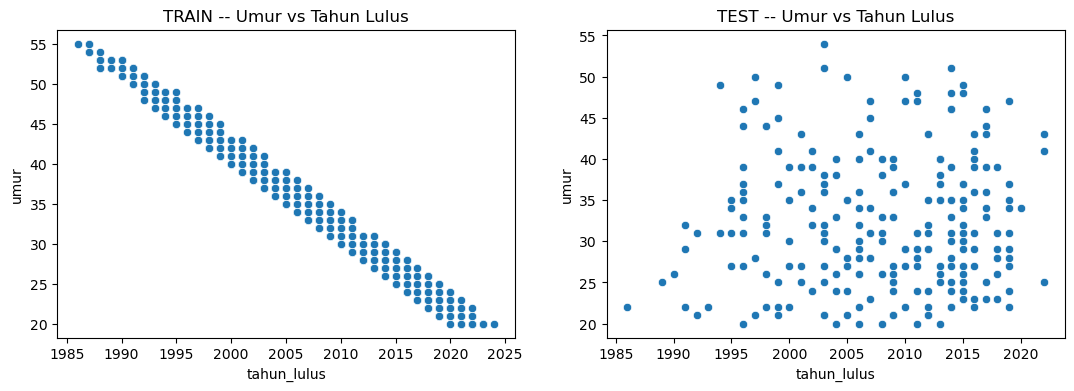

In [9]:
# Umur vs tahun lulus
fig, ax = plt.subplots(1,2, figsize = (13,4))
sns.scatterplot(train.tahun_lulus, train.umur, ax = ax[0])
ax[0].set_title('TRAIN -- Umur vs Tahun Lulus')
sns.scatterplot(test.tahun_lulus, test.umur, ax = ax[1])
ax[1].set_title('TEST -- Umur vs Tahun Lulus')
plt.tight_layout

Insight:
There is a different distribution between train and test for umur vs tahun_lulus. This is very important to note since the model will fit the train data to predict the test data.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

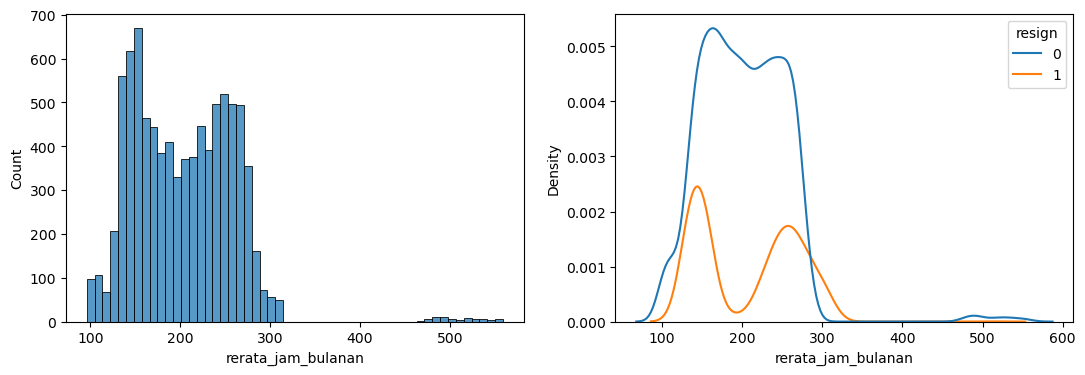

In [10]:
# Rerata jam bulanan
fig, ax = plt.subplots(1,2, figsize = (13,4))
sns.histplot(data = train, x = 'rerata_jam_bulanan', ax = ax[0])
sns.kdeplot(data = train, x = 'rerata_jam_bulanan', hue = 'resign',ax = ax[1])
plt.tight_layout

# hmm yg >400 gaada yg resign

Insight
- There are employees who have rerata_jam_bulanan for more than 400 hours, with all of them didn't resign
- There is a slight bump in the left part of the not resign ditribution graph

<AxesSubplot:xlabel='jumlah_proyek_yang_dikerjakan', ylabel='rerata_jam_bulanan'>

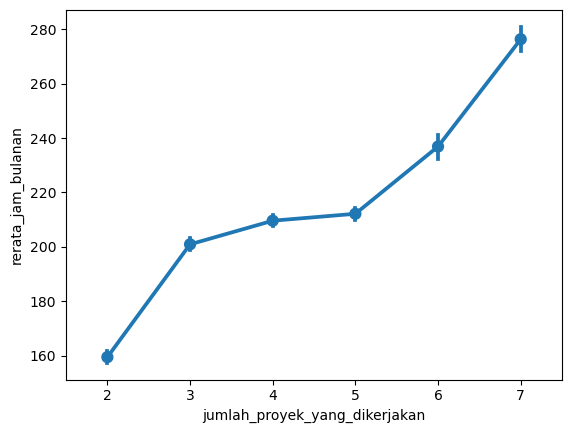

In [11]:
# Jumlah proyek vs rerata jam bulanan
sns.pointplot(train.jumlah_proyek_yang_dikerjakan, train.rerata_jam_bulanan)

# semakin banyak proyek, semakin tinggi rata2 jam bulanan
# Bisa isi missing valuenya rata2 jam bulanan berdasarkan jumlah proyek nih kayanya.
# Bisa juga jd categorical --> 2, 3-5, 6, 7 krn rata2nya sama nich 3-5 heheheh

Insight: 
- The more jumlah_proyek_yang_dikerjakan, the more rerata_jam_bulanan
- jumlah_proyek_yang_dikerjakan with the values of 3 to 5 have slight gradient, which means that they are actually a bit similar

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

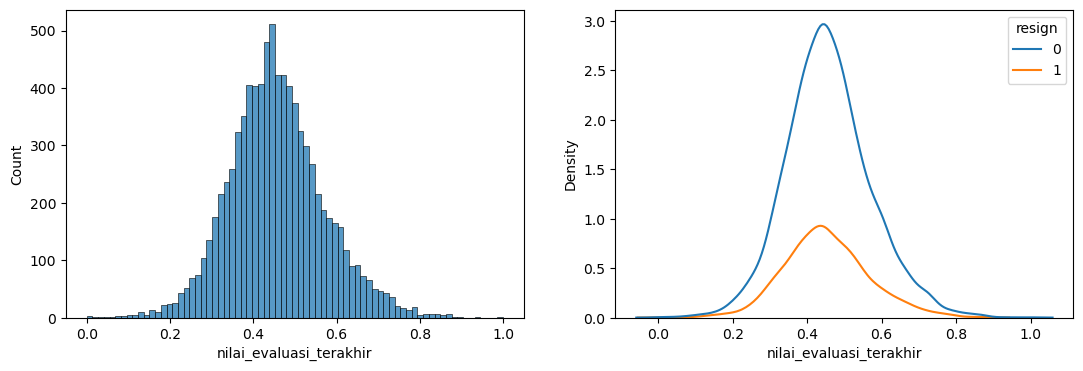

In [12]:
# Nilai evaluasi terakhir
fig, ax = plt.subplots(1,2, figsize = (13,4))
sns.histplot(data = train, x = 'nilai_evaluasi_terakhir', ax = ax[0])
sns.kdeplot(data = train, x = 'nilai_evaluasi_terakhir', hue = 'resign',ax = ax[1])
plt.tight_layout

Insight:
- The distribution has a bell curve shape. This can indicate that the data for the nilai_evaluasi_terakhir is normally distributed
- For each resign category, they have similar distribution as well, with the 1 value is more right skewed just a little bit

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

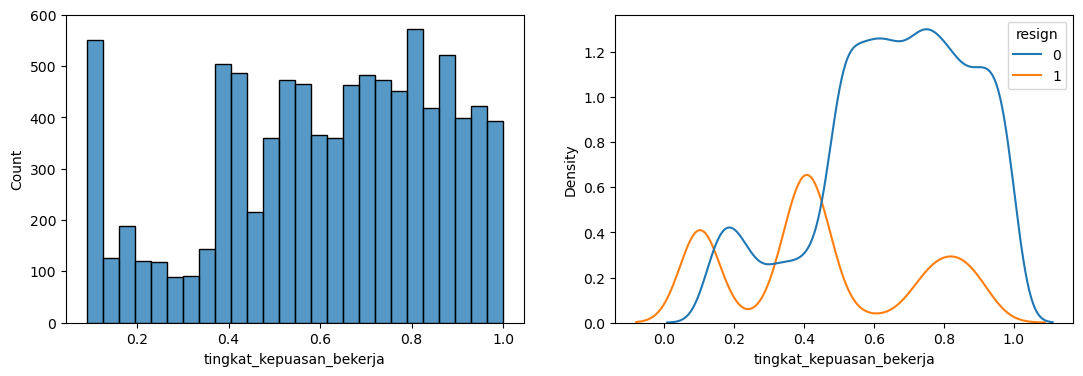

In [13]:
# Ingkat kepuasan bekerja
fig, ax = plt.subplots(1,2, figsize = (13,4))
sns.histplot(data = train, x = 'tingkat_kepuasan_bekerja', ax = ax[0])
sns.kdeplot(data = train, x = 'tingkat_kepuasan_bekerja', hue = 'resign',ax = ax[1])
plt.tight_layout

# hmmm jumlah kepuasan 0,1 dan 0.4 lebih tinggi yg resign,

Insight:
- for tingkat_kepuasan, the resign category (1) has the highest count in range 0.1, and also range 0.4.

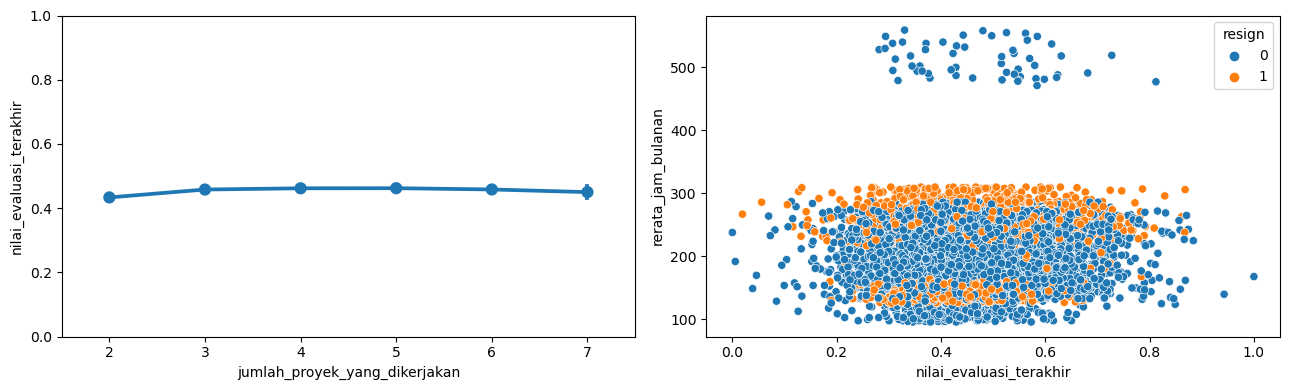

In [14]:
# Jumlah proyek vs nilai evaluasi akhir, rerata jam bek vs nilai evaluasi akhir
fig, ax = plt.subplots(1,2, figsize = (13,4))
sns.pointplot(train.jumlah_proyek_yang_dikerjakan, train.nilai_evaluasi_terakhir, ax = ax[0])
ax[0].set_ylim(0,1)
sns.scatterplot(y=train.rerata_jam_bulanan, x=train.nilai_evaluasi_terakhir, ax = ax[1], hue = train.resign)
plt.tight_layout()

Insight:
- the average nilai_evaluasi_terakhir for each jumlah_proyek_yang dikerjaan is relatively the same. this indicates that there is no influence between nilai_evaluasi_akhir and jumlah_proyek_yang_dikerjakan
- Nilai_evaluasi_terakhir is very dense at the mean value
- Most of the resign employee has rerata_jam_bulanan between 250-300 and 110-150.

<AxesSubplot:xlabel='jumlah_proyek_yang_dikerjakan', ylabel='tingkat_kepuasan_bekerja'>

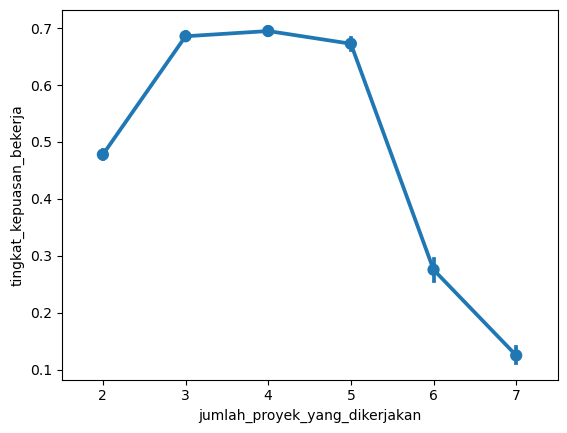

In [15]:
# Jumlah proyek vs tingkat kepuasan kerja
sns.pointplot(train.jumlah_proyek_yang_dikerjakan, train.tingkat_kepuasan_bekerja)

Insights:
- jumlah_proyek_yang_dikerjakan for value 3-5 are again have almost the same avrage value, and this time is for tingkat_kepuasan_bekerja. those value can be considered to be grouped
- tingkat_kepuasan bekerja is incerasing for 2 to 3, stagnant from 3 to 5, and decreasing from 5 to 6 and 6 to 7

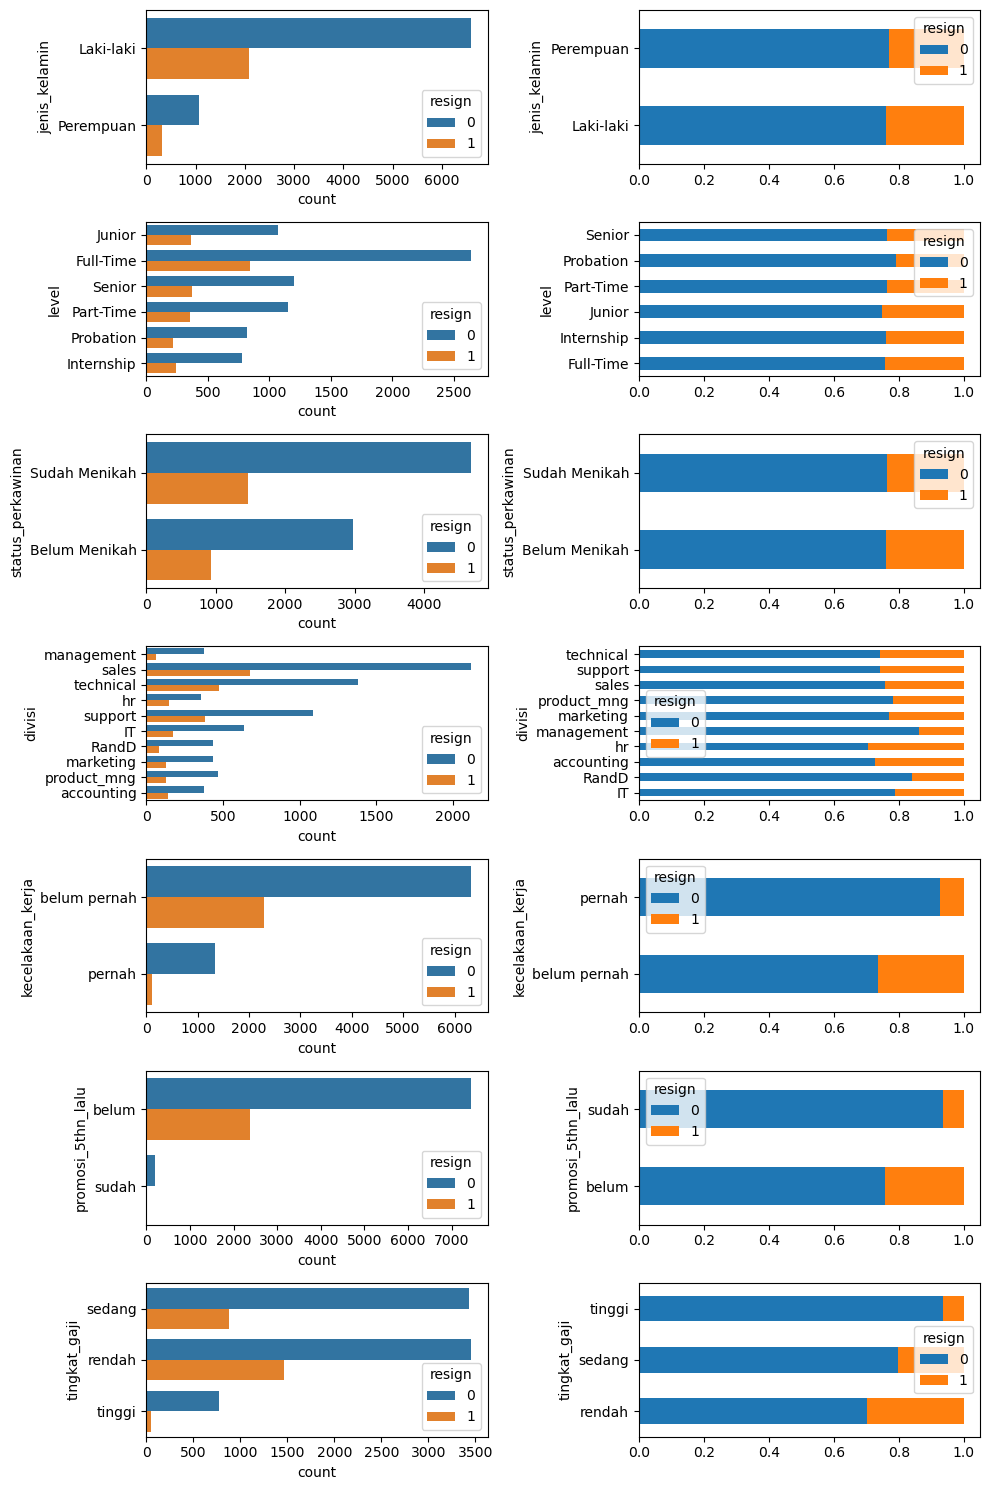

In [16]:
# Categorical variable
fig, ax = plt.subplots(7,2, figsize = (10,15))
for i,n in zip(train.drop('lama_di_perusahaan', axis = 1).select_dtypes('object').columns, range(0,7)):
    sns.countplot(data = train, y= i, hue = 'resign',ax = ax[n,0])
    pd.crosstab(index = train.resign, columns = train[i],normalize='columns').T.plot(kind = 'barh', stacked=True, ax = ax[n, 1])
plt.tight_layout()

Insights:
- Proportion-wise, jenis_kelamin, status_pernikahan, and level has almost the same value for each of their category. This can indicate that there is no relationship between those columns with the resignation decision

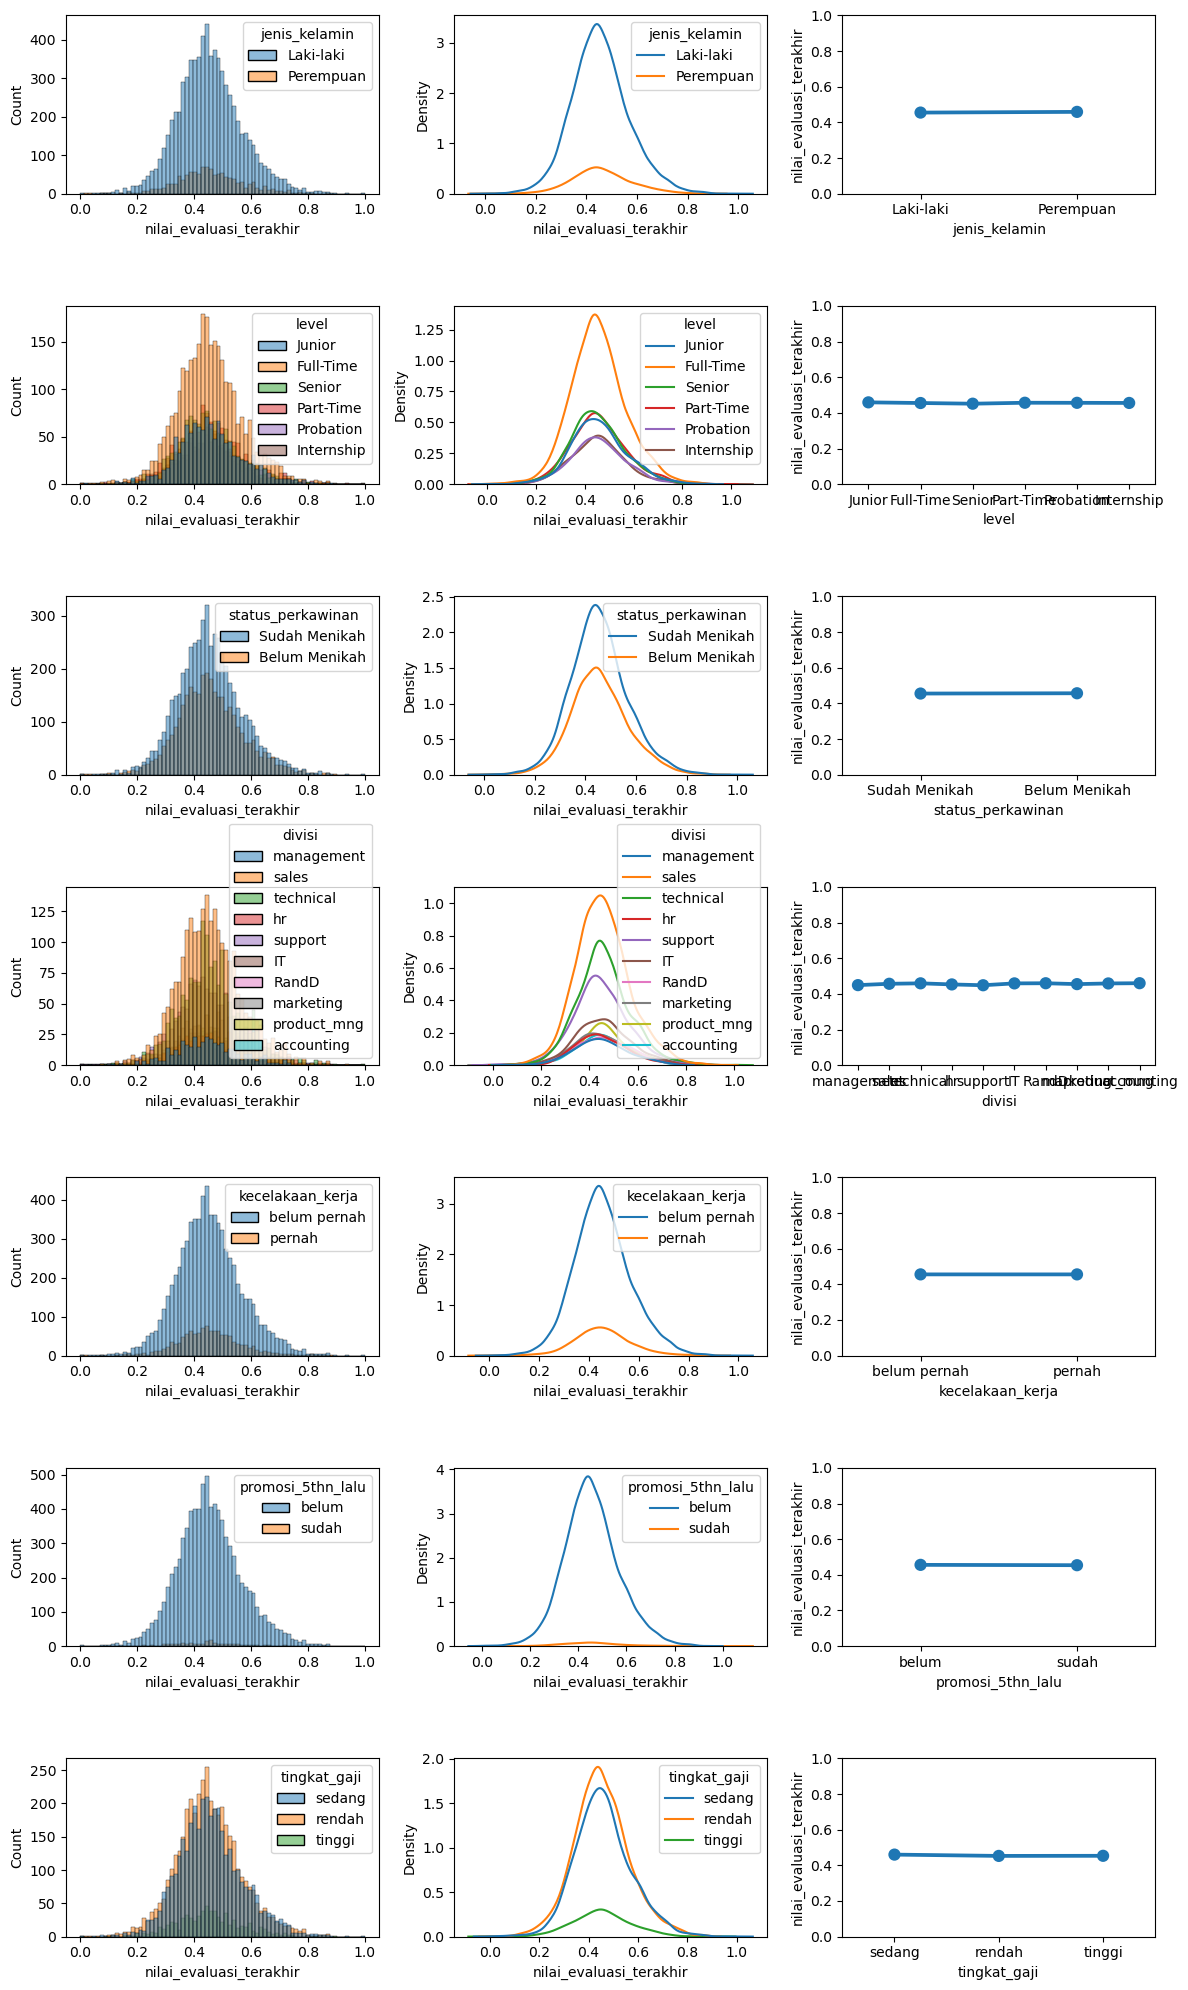

In [17]:
# Nilai_evaluasi_terakhir for each categorical variable
fig, ax = plt.subplots(7,3, figsize = (12,20))
for i,n in zip(train.drop('lama_di_perusahaan', axis = 1).select_dtypes('object').columns, range(0,7)):
    sns.histplot(data = train, x='nilai_evaluasi_terakhir', hue = i,ax = ax[n,0])
    sns.kdeplot(data = train, x='nilai_evaluasi_terakhir', hue = i,ax = ax[n,1])
    sns.pointplot(data = train, y='nilai_evaluasi_terakhir', x = i,ax = ax[n,2])
    ax[n,2].set_ylim(0,1)
plt.tight_layout()

Insight:
- from the pointplot, there is no significant gradient seen, which indicates that each of the categories has no relationship with nilai_evaluasi_terakhir
- Each of the category has the same distribution for each columns

---

**SUMMARY INSIGHT FOR THIS PART:**
- There is an imbalance categgory count for resign column
- There is inconsistency for lama_di_perusahaan
- Umur and tahun kelulusan have different distribution on train and test dataset. They also have the most missing values
- The more jumlah_proyek_yang_dikerjakan, the more rerata_jam_bulanan
- Nilai_evaluasi_terakhir distribution is similar to normal distribution. Each distribution for nilai_evaluasi_terakhir for each categorical columns are the same
- tingkat_kepuasan bekerja and jumlah_proyek_yang dikerjakan show a relationship where tingkat_kepuasan bekerja is incerasing for 2 to 3, stagnant from 3 to 5, and decreasing from 5 to 6 and 6 to 7

**TO DO:**
- Treating imbalance
- Use jumlah_proyek_yang_dikerjakan to fill the missing value on rerata_jam_bulanan and tingkat_kepuasan
- Replacing lama_di_perusahaan data to be more consistent

# Change data type

In [19]:
exploration(train)

Number of rows = 10049, Number of columns = 17


,type,is_na,is_na_prop,n_unique
employee_id,int64,0,0.000000,10049
umur,float64,7711,0.767340,36
jenis_kelamin,object,0,0.000000,2
IPK,float64,0,0.000000,10049
level,object,0,0.000000,6
tahun_lulus,float64,7711,0.767340,39
status_perkawinan,object,0,0.000000,2
divisi,object,0,0.000000,10
rerata_jam_bulanan,float64,1349,0.134242,261
tingkat_kepuasan_bekerja,float64,796,0.079212,92


In [21]:
# Create dataset for feature engineering
train_fe = train.copy()
test_fe = test.copy()

We are going to treat the inconsistency from lama_di_perusahaan first. All values will be turned in months format

In [22]:
# Transforming kolom Lama di Perusahaan
import re
replace_years = {'2 Years':'12 Months','3 Years':'36 Months','4 Years':'48 Months',
                 '5 Years':'60 Months','6 Years':'72 Months','7 Years':'84 Months','8 Years':'96 Months', '10 Years':'120 Months'}

for i,(j,k) in enumerate(replace_years.items()):
    train_fe.lama_di_perusahaan = train_fe.lama_di_perusahaan.apply(lambda x : re.sub(r"\b{}\b".format(j),k,x))
    test_fe.lama_di_perusahaan = test_fe.lama_di_perusahaan.apply(lambda x : re.sub(r"\b{}\b".format(j),k,x))

#change data type
train_fe.lama_di_perusahaan = train_fe.lama_di_perusahaan.str.replace(' Months', '').astype('int')
test_fe.lama_di_perusahaan = test_fe.lama_di_perusahaan.str.replace(' Months', '').astype('int')

train_fe.lama_di_perusahaan.unique()

array([ 36,  24,  12,  48,  60,  72,  84,  96, 120])

Next, we are going to map each of the nominal category into a numbered format. This must be done because the modelling can only receive numerical values as imputs

In [23]:
# Nominal
for data in [train_fe, test_fe]:
    data['jenis_kelamin'] = np.where(data['jenis_kelamin'] == 'Laki-laki',1,0)
    data['status_perkawinan'] = np.where(data['status_perkawinan'] == 'Sudah Menikah',1,0)
    data['promosi_5thn_lalu'] = np.where(data['promosi_5thn_lalu'] == 'sudah',1,0)
    data['kecelakaan_kerja'] = np.where(data['kecelakaan_kerja'] == 'pernah',1,0)
    data[['jenis_kelamin','status_perkawinan','promosi_5thn_lalu','kecelakaan_kerja', 'divisi']] = data[['jenis_kelamin','status_perkawinan','promosi_5thn_lalu','kecelakaan_kerja','divisi']].astype('category')

train_fe['resign'] = train_fe['resign'].astype('category')

For ordinal category variables, we are going to map the order for each the category. This will be used to turn the data into numerical categories with the desired order later.

In [24]:
# Ordinal
level_cat = pd.CategoricalDtype(['Internship','Part-Time','Probation','Junior','Full-Time','Senior'], ordered = True)
gaji_cat = pd.CategoricalDtype(['rendah','sedang','tinggi'])

for data in [train_fe, test_fe]:
    data['level'] = data['level'].astype(level_cat)
    data['tingkat_gaji'] = data['tingkat_gaji'].astype(gaji_cat)

train_fe.dtypes

employee_id                         int64
umur                              float64
jenis_kelamin                    category
IPK                               float64
level                            category
tahun_lulus                       float64
status_perkawinan                category
divisi                           category
rerata_jam_bulanan                float64
tingkat_kepuasan_bekerja          float64
nilai_evaluasi_terakhir           float64
jumlah_proyek_yang_dikerjakan       int64
lama_di_perusahaan                  int32
kecelakaan_kerja                 category
promosi_5thn_lalu                category
tingkat_gaji                     category
resign                           category
dtype: object

In [25]:
train_fe.level.unique()

['Junior', 'Full-Time', 'Senior', 'Part-Time', 'Probation', 'Internship']
Categories (6, object): ['Internship' < 'Part-Time' < 'Probation' < 'Junior' < 'Full-Time' < 'Senior']

# Missing data

Now, we are going to treat the missing data

In [26]:
exploration(train_fe)

Number of rows = 10049, Number of columns = 17


,type,is_na,is_na_prop,n_unique
employee_id,int64,0,0.000000,10049
umur,float64,7711,0.767340,36
jenis_kelamin,category,0,0.000000,2
IPK,float64,0,0.000000,10049
level,category,0,0.000000,6
tahun_lulus,float64,7711,0.767340,39
status_perkawinan,category,0,0.000000,2
divisi,category,0,0.000000,10
rerata_jam_bulanan,float64,1349,0.134242,261
tingkat_kepuasan_bekerja,float64,796,0.079212,92


The columns that are going to be treated are rerata_jam_bulanan and tingkat_kepuasan_bekerja. They both will be imputed based on the jumlah_proyek_yang_dikerjakan column.

In [27]:
# Imputing
for data in [train_fe, test_fe]:
    data['rerata_jam_bulanan'] = data['rerata_jam_bulanan'].fillna(data.groupby('jumlah_proyek_yang_dikerjakan')['rerata_jam_bulanan'].transform('mean'))
    data['tingkat_kepuasan_bekerja'] = data['tingkat_kepuasan_bekerja'].fillna(data.groupby('jumlah_proyek_yang_dikerjakan')['tingkat_kepuasan_bekerja'].transform('mean'))

Umur, tahun_lulus and nilai_evaluasi_terakhir will not be imputed because of these reasons:
- Umur & tahun lulus: They have too many missing values (about 70% of the data). They also have different distribution on train and teset dataset, so it is very risky to use these columns. These columns will be deleted later
- Nilai_evaluasi_terakhir: This column has no significant relation toward any other variables that makes it hard to be treated. As a column with normal distribution, mean value is considered to be used as the imputation value. However, there are more than 1500 missing values on this column, which by imputing the only mean value to the missing value, the distribution will change very significantly. The option is using random imputation with normal distribution setting, however it is just considerd better if we don't use this column at all since it has no significant relationships to any other columns, especially with resign

# Preprocess

Now, we are going too transform the data so it can be inputted to the model. The first step is to drop unnecessary columns

In [28]:
# Make another variable for easier manipulation
drop_columns = ['employee_id','umur', 'tahun_lulus', 'nilai_evaluasi_terakhir']
train_pp = train_fe.drop(drop_columns, axis = 1)
test_pp = test_fe.drop(drop_columns, axis = 1)
exploration(train_pp)

Number of rows = 10049, Number of columns = 13


,type,is_na,is_na_prop,n_unique
jenis_kelamin,category,0,0.0,2
IPK,float64,0,0.0,10049
level,category,0,0.0,6
status_perkawinan,category,0,0.0,2
divisi,category,0,0.0,10
rerata_jam_bulanan,float64,0,0.0,267
tingkat_kepuasan_bekerja,float64,0,0.0,98
jumlah_proyek_yang_dikerjakan,int64,0,0.0,6
lama_di_perusahaan,int32,0,0.0,9
kecelakaan_kerja,category,0,0.0,2


The next step is to encode the categorical variables. For nominal categories, there will be dummy variables to decrease multicolinearity. The ordinal category will me mapped into numerical variabel with the desired order.

In [29]:
# Encoding
for data in [train_pp, test_pp]:
    data['level'] = data['level'].cat.codes
    data['tingkat_gaji'] = data['tingkat_gaji'].cat.codes
    data[['jenis_kelamin','status_perkawinan','kecelakaan_kerja','promosi_5thn_lalu']] = data[['jenis_kelamin','status_perkawinan','kecelakaan_kerja','promosi_5thn_lalu']].astype('int')

train_pp.resign = train_pp.resign.astype('int')
train_pp = pd.concat([train_pp, pd.get_dummies(train_pp['divisi'], drop_first= True, prefix = 'divisi')], axis = 1).drop('divisi', axis = 1)
test_pp = pd.concat([test_pp, pd.get_dummies(test_pp['divisi'], drop_first= True, prefix = 'divisi')], axis = 1).drop('divisi', axis = 1)
train_pp.head()

,jenis_kelamin,IPK,level,status_perkawinan,rerata_jam_bulanan,tingkat_kepuasan_bekerja,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,...,resign,divisi_RandD,divisi_accounting,divisi_hr,divisi_management,divisi_marketing,divisi_product_mng,divisi_sales,divisi_support,divisi_technical
0,1,1.947303,3,1,210.000000,0.82,3,36,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3.218346,4,0,189.000000,0.76,3,24,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.117364,5,1,212.168553,0.81,5,12,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,3.178748,4,0,121.000000,0.84,3,36,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.680535,1,0,229.000000,0.48,3,36,0,0,...,0,0,0,0,0,0,0,0,0,1


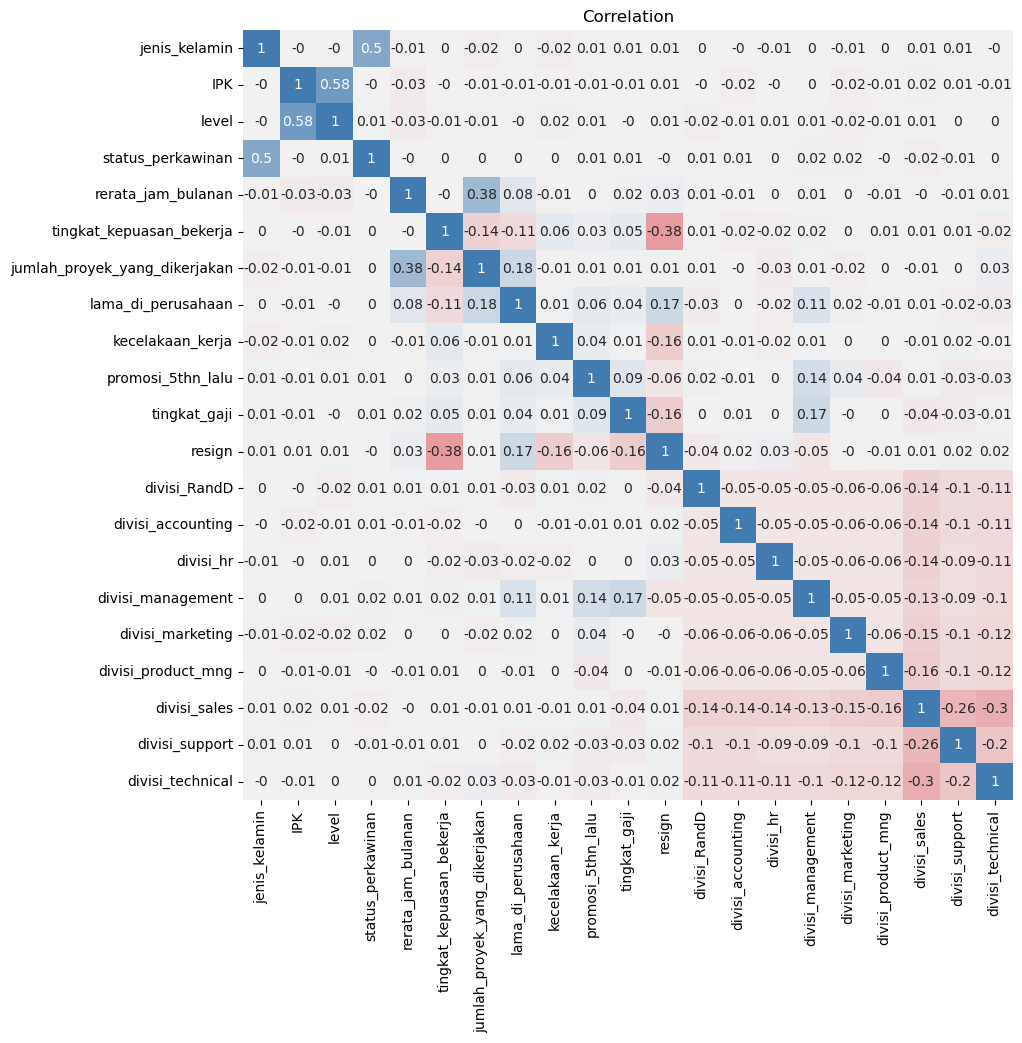

In [30]:
correlation_map(train_pp)

In [32]:
# Check stats
comparison= pd.DataFrame(test_pp.select_dtypes(['int64','int32','float64']).columns, columns = ['Columns'])
comparison['Train Mean'] = [train_pp[i].mean() for i in test_pp.select_dtypes(['int64','int32','float64']).columns]
comparison['Test Mean'] = [test_pp[i].mean() for i in test_pp.select_dtypes(['int64','int32','float64']).columns]
comparison['Train Std'] = [train_pp[i].std() for i in test_pp.select_dtypes(['int64','int32','float64']).columns]
comparison['Test Std'] = [test_pp[i].std() for i in test_pp.select_dtypes(['int64','int32','float64']).columns]
comparison

,Columns,Train Mean,Test Mean,Train Std,Test Std
0,jenis_kelamin,8.629714e-01,8.769697e-01,0.343895,0.328505
1,IPK,-3.394859e-16,2.033278e-16,1.000050,1.000101
2,status_perkawinan,6.110061e-01,7.450505e-01,0.487546,0.435877
3,rerata_jam_bulanan,1.655557e-16,-3.488119e-16,1.000050,1.000101
4,tingkat_kepuasan_bekerja,1.974295e-16,1.468130e-16,1.000050,1.000101
5,jumlah_proyek_yang_dikerjakan,8.070633e-17,-7.161499e-17,1.000050,1.000101
6,lama_di_perusahaan,2.637843e-16,3.218974e-16,1.000050,1.000101
7,kecelakaan_kerja,1.430988e-01,1.476768e-01,0.350191,0.354815
8,promosi_5thn_lalu,2.169370e-02,2.040404e-02,0.145689,0.141392


The numerical data will also be standardized for easier importance interpretation

In [31]:
# Standardize
from sklearn.preprocessing import StandardScaler
for data in [train_pp, test_pp]:
    data[['IPK', 'rerata_jam_bulanan', 'jumlah_proyek_yang_dikerjakan', 'lama_di_perusahaan', 'tingkat_kepuasan_bekerja']] = pd.DataFrame(
        StandardScaler().fit_transform(data[['IPK', 'rerata_jam_bulanan', 'jumlah_proyek_yang_dikerjakan', 'lama_di_perusahaan', 'tingkat_kepuasan_bekerja']]))
train_pp

,jenis_kelamin,IPK,level,status_perkawinan,rerata_jam_bulanan,tingkat_kepuasan_bekerja,jumlah_proyek_yang_dikerjakan,lama_di_perusahaan,kecelakaan_kerja,promosi_5thn_lalu,...,resign,divisi_RandD,divisi_accounting,divisi_hr,divisi_management,divisi_marketing,divisi_product_mng,divisi_sales,divisi_support,divisi_technical
0,1,-0.516854,3,1,0.132850,0.862719,-0.649972,-0.225808,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.946735,4,0,-0.260601,0.613929,-0.649972,-0.836122,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,-0.321031,5,1,0.173479,0.821254,0.979662,-1.446437,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0.901139,4,0,-1.534633,0.945649,-0.649972,-0.225808,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0.327453,1,0,0.488829,-0.547091,-0.649972,-0.225808,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,0,-0.267571,5,0,-0.504166,-1.791041,0.164845,0.384506,1,0,...,0,0,0,0,0,0,0,1,0,0
10045,1,-0.947150,2,1,-0.335544,1.484694,-0.649972,-1.446437,0,0,...,0,0,0,0,0,0,0,0,0,1
10046,1,0.676301,4,1,-1.291068,-0.712951,-1.464789,-0.225808,0,0,...,1,0,0,1,0,0,0,0,0,0
10047,1,0.645506,4,1,-0.672788,0.489534,0.979662,-0.225808,0,0,...,0,0,0,1,0,0,0,0,0,0


# Cross Validation

Now, we are at the modelling stage. To create the best modelling output, we are going to determine the best parmeter for each models that are going to be evaluated. To do this, we are going to use Grid Search because the dataset size is not big (if it is big, use random search to save memory and time). The imbalance treatment used is undersampling (just for limitation). 

In [34]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

def best_param(X, y, model, parameters, imbalance = True):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0, stratify = y)

    if imbalance == True:
        un = RandomUnderSampler(random_state= 1)
        X_train, y_train = un.fit_resample(X_train, y_train)
    else: pass        

    model_grid = GridSearchCV(model, parameters, cv=5,scoring='f1_macro')

    model_grid.fit(X_train, y_train)

    best_par = model_grid.best_params_
    best_score = model_grid.best_score_

    return(best_par, best_score)

In [35]:
# Mau bikin fungsi yg lebih enakan
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

RFC = RandomForestClassifier
param_RFC = {'max_depth': [3, 5, 7, 9, 11, 13], 'n_estimators': [5, 10, 15, 20, 25], 'random_state' : [0]}

DTC = DecisionTreeClassifier
param_DTC = {'max_depth': [3, 5, 7, 9], 'criterion':['gini','entropy','log_loss'], 'random_state':[0]}

XGB = xgb.XGBClassifier
param_XGB = {'max_depth': [3, 5, 7, 9],'n_estimators': [5, 10, 15, 20, 25, 50, 100], 'learning_rate': [0.01, 0.05, 0.1], 'random_state' : [0]}

LGB = LGBMClassifier
param_LGB = {'max_depth': [3, 5, 7, 9], 'random_state' : [0]}

modelz = [RFC, DTC, XGB, LGB]
modelz_name = ['RFC', 'DTC', 'XGB', 'LGB']
best_parameter = []
best_scores = []


for i,n in zip(modelz, modelz_name):
    globals()[f'par_{n}'], globals()[f'scr_{n}'] = best_param(train_pp.drop('resign', axis = 1), train_pp['resign'], i(), globals()[f'param_{n}'])
    best_parameter.append(globals()[f'par_{n}'])
    best_scores.append(globals()[f'scr_{n}'])

# Make dataframe summary
gs_data = pd.DataFrame([modelz_name, best_parameter, best_scores]).T.rename(columns= {0:'Model', 1:'Best Parameter', 2:'Best Score'})
gs_data.sort_values(by = 'Best Score', ascending = False)

,Model,Best Parameter,Best Score
3,LGB,"{'max_depth': 9, 'random_state': 0}",0.949838
2,XGB,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",0.949834
0,RFC,"{'max_depth': 13, 'n_estimators': 25, 'random_...",0.944338
1,DTC,"{'criterion': 'entropy', 'max_depth': 9, 'rand...",0.943046


The table above shows the best parameter used for each model and the best score possible. Then, we are going to use K-Fold validation to make sure the model won't overfit the train data.

In [36]:
# Function for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.under_sampling import RandomUnderSampler



def modelling_imbalanced(X,y, imbalance = True):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    un = RandomUnderSampler(random_state= 1)
    fold_list = []
    for (train_ix, test_ix), g in zip(kfold.split(X, y), range(1,6)):
        globals()[f'Fold_{g}'] = []
        # select rows
        train_X, test_X = X.loc[train_ix], X.loc[test_ix]
        train_y, test_y = y.loc[train_ix], y.loc[test_ix]

        # imbalance treatment
        if imbalance == True:
            x_res, y_res = un.fit_resample(train_X, train_y)
        else:
            x_res = train_X.copy()
            y_res = train_y.copy()

        for i,n, param in zip(modelz, modelz_name, gs_data['Best Parameter']):
            model = i(**param)
            model.fit(x_res, y_res)
            predicted = model.predict(test_X)

            score = f1_score(test_y, predicted, average = 'macro')
            globals()[f'Fold_{g}'].append(score)
        
        fold_list.append(globals()[f'Fold_{g}'])
        
    dat = pd.DataFrame(fold_list, columns = modelz_name, index = ['Fold {}'.format(x) for x in range(1,6)]).T
    dat['Mean'] = dat.mean(axis = 1)
    dat = dat.sort_values(by = 'Mean', ascending = False)
    best_mo = dat.index[0]
    print('Best Model: {} | with Best Params: {}'.format(dat.index[0] , gs_data[gs_data.Model == dat.index[0]]['Best Parameter'].values[0]))
    display(dat)

    return dat

fold_data = modelling_imbalanced(train_pp.drop('resign', axis = 1), train_pp['resign'])

Best Model: XGB | with Best Params: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'random_state': 0}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
XGB,0.954319,0.950577,0.927308,0.953350,0.954834,0.948078
LGB,0.955097,0.949223,0.934959,0.947520,0.951585,0.947677
RFC,0.950229,0.943728,0.934052,0.950806,0.943964,0.944556
DTC,0.924328,0.930163,0.918123,0.934423,0.937716,0.928950


Based on the iteration, it can be seen that XGBoost is the model with the best average score

# Modelling

We already identify the best model with the best parameter. Now, we are going to model the data and prodict the test dataset

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

final_model = globals()[f'{fold_data.index[0]}'](**gs_data[gs_data.Model == fold_data.index[0]]['Best Parameter'].values[0])

X = train_pp.drop('resign', axis = 1)
y = train_pp['resign']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0, stratify = y)

un = RandomUnderSampler(random_state= 1)
X_train, y_train = un.fit_resample(X_train, y_train)

final_model.fit(X_train, y_train)
y_predict = final_model.predict(X_test)

print(classification_report(y_test, y_predict))
print(f1_score(y_test, y_predict, average = 'macro'))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1532
           1       0.91      0.94      0.92       478

    accuracy                           0.96      2010
   macro avg       0.95      0.96      0.95      2010
weighted avg       0.96      0.96      0.96      2010

0.9505081574011268


In [38]:
predz = final_model.predict(test_pp)
predz

array([1, 0, 0, ..., 0, 0, 0])

In [39]:
hasil = pd.concat([test['employee_id'], pd.DataFrame(predz, columns = ['resign'])], axis = 1).set_index('employee_id')
hasil.to_csv('hasil_1.csv')

It is also important to see the importance of variables to the model. Permutation importance is going to be used to visualize the importance of variables

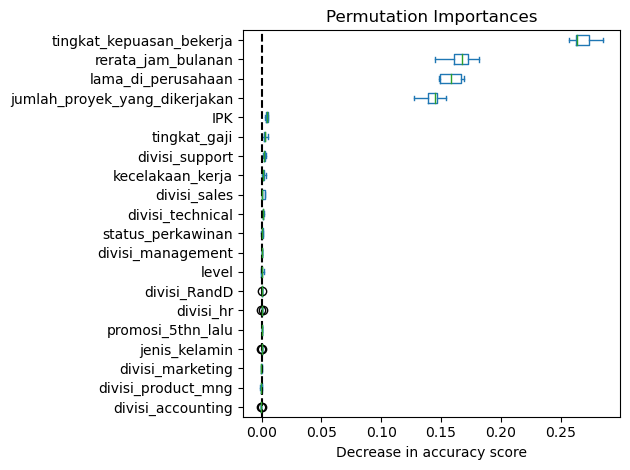

In [40]:
# Permutation Importances
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(final_model, X_test, y_test, scoring='f1_macro')

sorted_importances_idx = perm_importance.importances_mean.argsort()
perm_importance = pd.DataFrame(perm_importance.importances[sorted_importances_idx].T,columns=X.columns[sorted_importances_idx],)

ax = perm_importance.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

It can be seen that tingkat_kepuasan_bekerja, rerata_jam_bualann, lama_di_perusahaan, and jumlah_proyek_yang_dikerjakan are the most important variables. Hence, it is very important for the company to prioritize these variables to reduce the employee turnover rate